# __Docking Poses Filtering__
Apply filters to the top 100 ranking poses according to distance metrics. 

In [1]:
# general imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('lines', lw=1, color='b')
rc('legend', loc='best')
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams['legend.borderpad'] = 0.25
plt.rcParams['legend.fontsize'] = 11
plt.rcParams.update({'pgf.preamble': r'\usepackage{amsmath}'})


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_chimera(path, HETE=False):
    '''
    read distance data from chimera
    '''

    # [(entry1)[H13A, H13B, H10A, H10B], (entry2), ...]
    data = []   

    with open(path) as file:
        k=0
        l=1
        temp = []
        m=0
        line_counter=0

        model_number = []
        docking_number = []
        for line in file:
            line_counter+=1

            if m==0:
                m+=1
                continue

            #restrict to max #100 ligands
            if line_counter <= 101:
                stripped = line.rstrip().lstrip()
                res = stripped.split('#', 1)[1]
                import re
                a = re.findall(r'\D*(\d+)', res)
                model_number.append(a[0])
                docking_number.append(a[-1])


            if '#0' in line:
                #print(line.rstrip().lstrip())
                #print(float(line.rstrip().lstrip()[-5:]))
                
                temp.append(float(line.rstrip().lstrip()[-5:]))
                k+=1
                #print(l)
                if HETE:
                    if k%8 == 0:
                        temp.append(float(model_number[l-1]))
                        temp.append(float(docking_number[l-1]))
                        #print(temp)
                        data.append(temp)
                        temp = []
                        l+=1
                else: 
                    if k%7 == 0:
                        #print(temp)
                        temp.append(float(model_number[l-1]))
                        temp.append(float(docking_number[l-1]))
                        data.append(temp)
                        temp = []
                        l+=1 
            


    array = np.array(data)
    return array

In [3]:
# old filtering used for testing
# filter H13A and H10A distances, filter carboxylate O < 5 Å, filter distance cavity < 6A 
#output_AA = dummy_AA[((data_AA[:,0] > 2) & (data_AA[:,0] < 4)) & ((data_AA[:,2] > 2) & (data_AA[:,2] < 4)) & ((data_AA[:,4] < 3.0) | (data_AA[:,5] < 3.0)) & (data_AA[:,6] < 4) , :]


# filter H13A and H10A distances, filter carboxylate O < 5 Å, filter distance cavity < 6A 
#output_5P = dummy_5P[((data_5HPETE[:,0] > 2) & (data_5HPETE[:,0] < 4.5)) & ((data_5HPETE[:,2] > 2) & (data_5HPETE[:,2] < 4.5)) & ((data_5HPETE[:,4] < 2.8) |  (data_5HPETE[:,5] < 2.8)) & (data_5HPETE[:,6] < 4), :]


# filter H13A and H10A distances, filter carboxylate O < 5 Å, filter distance cavity < 6A 
#output_5H = dummy_5H[((data_5HETE[:,1] > 2) & (data_5HETE[:,0] < 7)) & ((data_5HETE[:,2] > 2) & (data_5HETE[:,2] < 7)) & ((data_5HETE[:,4] < 4) |  (data_5HETE[:,5] < 4)) & (data_5HETE[:,6] < 5) & (data_5HETE[:,7] < 3), :]

In [4]:
# read chimera distance data
filename_AA='/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/AA_h15_clusterized/sols_12/top100/distances_100.txt'
data_AA = read_data_chimera(filename_AA, HETE=False)

# sorting
h_13_a_AA = data_AA[:,0]
h_13_b_AA = data_AA[:,1]
h_10_a_AA = data_AA[:,2]
h_10_b_AA = data_AA[:,3]
o_1_AA = data_AA[:,4]
o2_AA = data_AA[:,5]
met_AA = data_AA[:,6]


filename_5HpETE='/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HpETE_h15_clusterized/sols_12/top100/distances_100.txt'
data_5HPETE = read_data_chimera(filename_5HpETE, HETE=True)

h_13_a_5P = data_5HPETE[:,0]
h_13_b_5P = data_5HPETE[:,1]
h_10_a_5P = data_5HPETE[:,2]
h_10_b_5P = data_5HPETE[:,3]
# potser a i b labels s'han intercanviat!
o_1_5P = data_5HPETE[:,4]
o2_5P = data_5HPETE[:,5]
met_5P = data_5HPETE[:,6]
o3_5P = data_5HPETE[:,7]


filename_5HETE='/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HETE_h15_clusterized/sols_12/top100/distances_100.txt'
data_5HETE = read_data_chimera(filename_5HETE, HETE=True)

h_13_a_5H = data_5HETE[:,0]
h_13_b_5H = data_5HETE[:,1]
h_10_a_5H = data_5HETE[:,2]
h_10_b_5H = data_5HETE[:,3]
# potser a i b labels s'han intercanviat!
o_1_5H = data_5HETE[:,4]
o2_5H = data_5HETE[:,5]
met_5H = data_5HETE[:,6]
o3_5H = data_5HETE[:,7]

# gather the data for plotting 
xdata_AA = [h_13_a_AA, h_13_b_AA, h_10_a_AA, h_10_b_AA, o_1_AA, o2_AA, met_AA]
xdata_5HpETE =[h_13_b_5P, h_13_a_5P, h_10_b_5P, h_10_a_5P, o_1_5P, o2_5P, met_5P, o3_5P]
xdata_5HETE =[h_13_b_5H, h_13_a_5H, h_10_b_5H, h_10_a_5H, o_1_5H, o2_5H, met_5H, o3_5H]


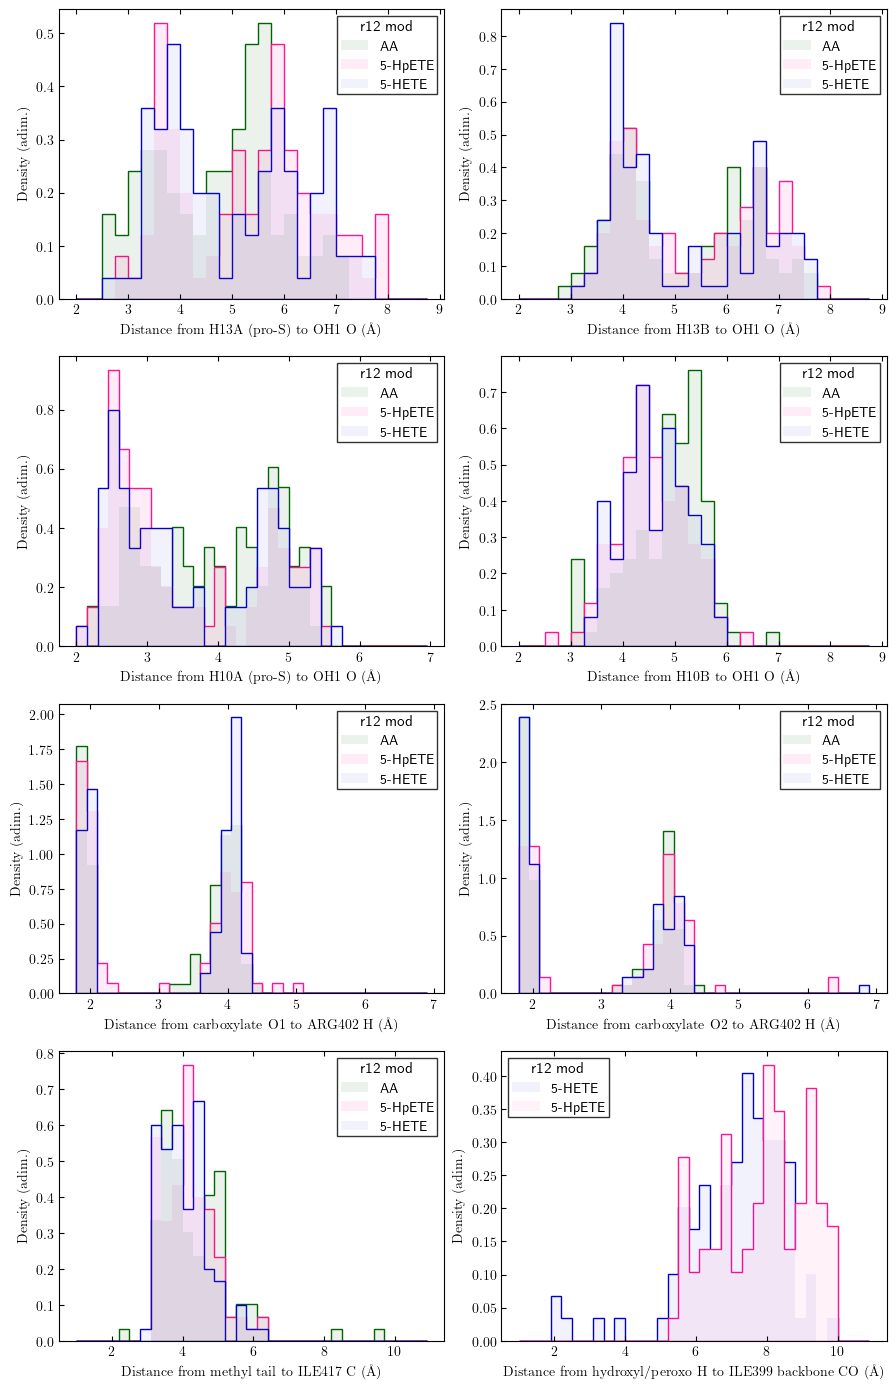

In [5]:
# plot for the set of ligands, all metrics, one radius, 

# figure settings
xlabels = ['H13A (pro-S)', 'H13B', 'H10A (pro-S)', 'H10B', 'carboxylate O1', 'carboxylate O2', 'methyl tail', 'hydroxyl/peroxo H']
xtargets = ['OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'ARG402 H', 'ARG402 H', 'ILE417 C', 'ILE399 backbone CO']
radius = 12
extra = 'mod'
xradii = [f'r{radius} {extra}', f'r{radius} {extra}', f'r{radius} {extra}', f'r{radius} {extra}', f'r{radius} {extra}', f'r{radius} {extra}', f'r{radius} {extra}', f'r{radius} {extra}']

bins = np.arange(2, 9, 0.25)
bins_H10 = np.arange(2, 7, 0.15)
bins_ARG = np.arange(1.8, 7, 0.15)
bins_ILE = np.arange(1, 11, 0.3)
bin_list = [bins,bins,bins_H10,bins,bins_ARG,bins_ARG, bins_ILE, bins_ILE]


# generate the figure
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(9, 14))
_axes = axes[0,0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2,1], axes[3,0], axes[3,1]


for i in range(len(_axes)):
    
    _axes[i].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
    _axes[i].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")

    #ax1.axvline(x=thereshold_line, color='black', alpha=0.8, ls='dotted', label='thereshold')    
    if i==7:
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=0.05)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.05)   

    else:
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, edgecolor='darkgreen', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, color='darkgreen', label='AA', alpha=.08)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.08)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=.05)    

            
    _axes[i].set(xlabel=r'$\textnormal{Distance from '+f'{xlabels[i]}'+r' to '+f'{xtargets[i]}'+' (Å)}$', ylabel=r'$\textnormal{Density (adim.)}$')
    _axes[i].legend(loc='best', prop={'size': 10}, title=r'$\textsf{'+f'{xradii[i]}'+r'}$', title_fontsize=11)

plt.tight_layout()
plt.savefig('docking_analysis_12_mod.png', dpi=400)
plt.show()

In [6]:
# filtering
dummy_AA = np.array(data_AA, copy=True)  
dummy_5P = np.array(data_5HPETE, copy=True) 
dummy_5H = np.array(data_5HETE, copy=True) 
np.set_printoptions(suppress=True, linewidth=1000)

output_AA = dummy_AA[((data_AA[:,0] > 2) & (data_AA[:,0] < 4)) & ((data_AA[:,2] > 2) & (data_AA[:,2] < 4)) , :]
print(f'AA')
print(np.array(output_AA))
print()


output_5P = dummy_5P[((data_5HPETE[:,1] > 2) & (data_5HPETE[:,1] < 4)) & ((data_5HPETE[:,3] > 2) & (data_5HPETE[:,3] < 4)), :]
print(f'5-HpETE')
print(np.array(output_5P))
print()

output_5H = dummy_5H[((data_5HETE[:,1] > 2) & (data_5HETE[:,1] < 4)) & ((data_5HETE[:,3] > 2) & (data_5HETE[:,3] < 4)), :]
print('5-HETE')
print(np.array(output_5H))
print()


# assign the resulting data 
h_13_a_AA = output_AA[:,0]
h_13_b_AA = output_AA[:,1]
h_10_a_AA = output_AA[:,2]
h_10_b_AA = output_AA[:,3]
o_1_AA = output_AA[:,4]
o2_AA = output_AA[:,5]
met_AA = output_AA[:,6]


h_13_a_5P = output_5P[:,0]
h_13_b_5P = output_5P[:,1]
h_10_a_5P = output_5P[:,2]
h_10_b_5P = output_5P[:,3]
# potser a i b labels s'han intercanviat!
o_1_5P = output_5P[:,4]
o2_5P = output_5P[:,5]
met_5P = output_5P[:,6]
o3_5P = output_5P[:,7]


h_13_a_5H = output_5H[:,0]
h_13_b_5H = output_5H[:,1]
h_10_a_5H = output_5H[:,2]
h_10_b_5H = output_5H[:,3]
# potser a i b labels s'han intercanviat!
o_1_5H = output_5H[:,4]
o2_5H = output_5H[:,5]
met_5H = output_5H[:,6]
o3_5H = output_5H[:,7]

# gather the data for plotting 
xdata_AA = [h_13_a_AA, h_13_b_AA, h_10_a_AA, h_10_b_AA, o_1_AA, o2_AA, met_AA]
xdata_5HpETE =[h_13_b_5P, h_13_a_5P, h_10_b_5P, h_10_a_5P, o_1_5P, o2_5P, met_5P, o3_5P]
xdata_5HETE =[h_13_b_5H, h_13_a_5H, h_10_b_5H, h_10_a_5H, o_1_5H, o2_5H, met_5H, o3_5H]

# plot 
plot = False

if plot:

    # figure settings
    xlabels = ['H13A (pro-S)', 'H13B', 'H10A (pro-S)', 'H10B', 'carboxylate O1', 'carboxylate O2', 'methyl tail', 'hydroxyl/peroxo H']
    xtargets = ['OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'ARG402 H', 'ARG402 H', 'ILE417 C', 'ILE399 backbone CO']

    bins = np.arange(2, 9, 0.25)
    bins_H10 = np.arange(2, 7, 0.15)
    bins_ARG = np.arange(1.8, 7, 0.15)
    bins_ILE = np.arange(1, 11, 0.3)
    bin_list = [bins,bins,bins_H10,bins,bins_ARG,bins_ARG, bins_ILE, bins_ILE]


    # generate the figure
    fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(9, 14))
    _axes = axes[0,0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2,1], axes[3,0], axes[3,1]


    for i in range(len(_axes)):
        
        _axes[i].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
        _axes[i].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")

        #ax1.axvline(x=thereshold_line, color='black', alpha=0.8, ls='dotted', label='thereshold')    
        if i==7:
            _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
            _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
            _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=0.05)    
            _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.05)   

        else:
            _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, edgecolor='darkgreen', color='w', histtype='stepfilled')
            _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
            _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
            _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, color='darkgreen', label='AA', alpha=.08)    
            _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.08)
            _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=.05)    

                
        _axes[i].set(xlabel=r'$\textnormal{Distance from '+f'{xlabels[i]}'+r' to '+f'{xtargets[i]}'+' (Å)}$', ylabel=r'$\textnormal{Density (adim.)}$')
        _axes[i].legend(loc='best')

    plt.tight_layout()
    #plt.savefig('docking_analysis_AF.png', dpi=400)
    plt.show()


AA
[[  3.374   4.036   2.94    3.102   1.871   4.049   4.771   6.    358.   ]
 [  3.411   4.413   3.269   4.507   1.842   3.831   3.987  27.     54.   ]
 [  3.648   3.783   3.06    4.797   1.761   3.785   3.529  32.    217.   ]
 [  3.917   3.652   3.418   5.083   1.897   3.558   4.702  36.    500.   ]
 [  3.928   3.705   3.105   4.562   1.873   4.072   4.151  38.    178.   ]
 [  2.905   3.971   3.93    5.252   3.471   1.942   3.625  44.    429.   ]
 [  3.627   3.798   3.021   4.747   3.846   1.85    3.971  45.    195.   ]
 [  2.72    4.098   3.644   3.478   3.319   1.722   3.806  49.    194.   ]
 [  3.837   5.294   2.604   3.662   4.071   1.947   3.449  53.    456.   ]
 [  3.681   4.03    3.399   4.983   1.789   3.718   4.882  54.    144.   ]
 [  3.811   3.968   2.657   4.188   1.978   3.321   5.1    55.    106.   ]
 [  3.151   3.37    2.882   4.595   1.866   3.946   3.826  63.    175.   ]
 [  3.082   2.945   2.876   4.444   3.913   1.822   4.725  72.    293.   ]
 [  2.925   3.43    2.

Potser estaria bé fer igual però de la distància dels dos O amb 

sel :402@HH11 (ARG de l'inici de la cabitat)
sel #1@o1 (O més aprop)
sel #1@o2 (O més llunya)

#sel :559@cb (CYS del fons de la cabitat)
sel :417@cd1 (millor aquest carboni de la ILE417)
sel #1@c20 (C del fons)

#H bonding ILE399 
sel :399@o

sel #0:664@oh (OH O, que és propiament el que fa l'extracció) 
sel #0:598 (ARG però està molt fora... no sé com hauria d'interaccionar amb el carboxilat...)

rotàmers flexibles amb la arg402. 

## __Effects of increasing radius to H10/H13 distances__

In [7]:
# TODO el mateix plot però només amb distàncies H13 - O / H10 - O. una columna per cada H i cada fila per cada radi.
# tot i que tinc més filtres que es poden aplicar, aquests no s'han fet servir (només per la selecció del OH-backbone ILE399, que estava més targeted)

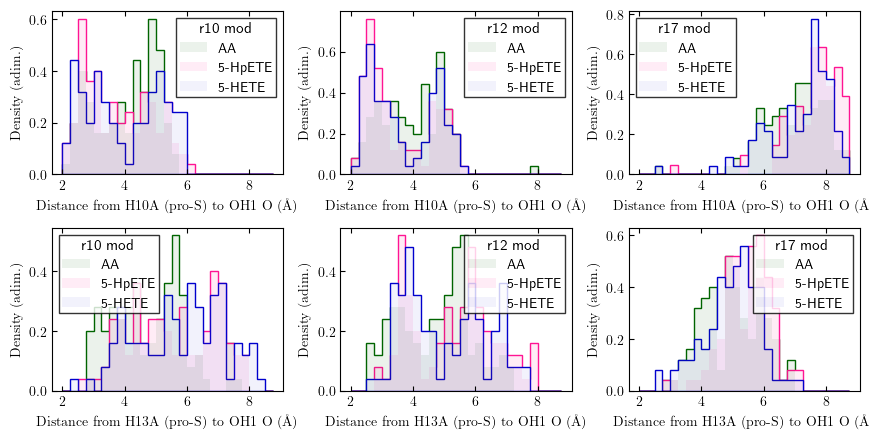

In [8]:
# read chimera distance data

radius_list = [10, 12, 17]

xdata_AA = []
xdata_5HpETE =[]
xdata_5HETE =[]

for radius in radius_list:
    filename_AA = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/AA_h15_clusterized/sols_{radius}/top100/distances_100.txt'
    data_AA = read_data_chimera(filename_AA, HETE=False)
    
    # append el H10 for radius i
    xdata_AA.append(data_AA[:,2])
    # append el H13 for radius i
    xdata_AA.append(data_AA[:,0])


    filename_5HpETE = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HpETE_h15_clusterized/sols_{radius}/top100/distances_100.txt'
    data_5HPETE = read_data_chimera(filename_5HpETE, HETE=True)

    xdata_5HpETE.append(data_5HPETE[:,3])
    xdata_5HpETE.append(data_5HPETE[:,1])


    filename_5HETE = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HETE_h15_clusterized/sols_{radius}/top100/distances_100.txt'
    data_5HETE = read_data_chimera(filename_5HETE, HETE=True)
    xdata_5HETE.append(data_5HETE[:,3])
    xdata_5HETE.append(data_5HETE[:,1])


# plot for the set of ligands, all metrics, one radius, 

# figure settings
xlabels = ['H10A (pro-S)', 'H13A (pro-S)', 'H10A (pro-S)', 'H13A (pro-S)', 'H10A (pro-S)', 'H13A (pro-S)']
xtargets = ['OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'OH1 O']
extra = 'mod'
xradii = [f'r10 {extra}', f'r10 {extra}', f'r12 {extra}', f'r12 {extra}', f'r17 {extra}', f'r17 {extra}']

bins = np.arange(2, 9, 0.25)
bins_H10 = np.arange(2, 7, 0.15)
bins_ARG = np.arange(1.8, 7, 0.15)
bins_ILE = np.arange(1, 11, 0.3)
bin_list = [bins, bins, bins, bins, bins, bins]


# generate the figure
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(8.8, 4.5))
#_axes = axes[0,0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2,1]
_axes = axes[0,0], axes[1, 0], axes[0, 1], axes[1,1], axes[0, 2], axes[1,2]

for i in range(len(_axes)):
    
    _axes[i].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
    _axes[i].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")

    #ax1.axvline(x=thereshold_line, color='black', alpha=0.8, ls='dotted', label='thereshold')    
    if i==7:
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=0.05)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.05)   

    else:
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, edgecolor='darkgreen', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, color='darkgreen', label='AA', alpha=.08)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.08)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=.05)    

            
    _axes[i].set(xlabel=r'$\textnormal{Distance from '+f'{xlabels[i]}'+r' to '+f'{xtargets[i]}'+' (Å)}$', ylabel=r'$\textnormal{Density (adim.)}$')
    _axes[i].legend(loc='best', prop={'size': 10}, title=r'$\textsf{'+f'{xradii[i]}'+r'}$', title_fontsize=11)

plt.tight_layout()
plt.savefig('docking_analysis_radii_comparison.png', dpi=400)
plt.show()


# es veu com el lligand marxa de la cavitat, la qual cosa afavoreix la reactivitat pel C13

## __Effects of the Arg402 rotamer on the H10/H13 distances__

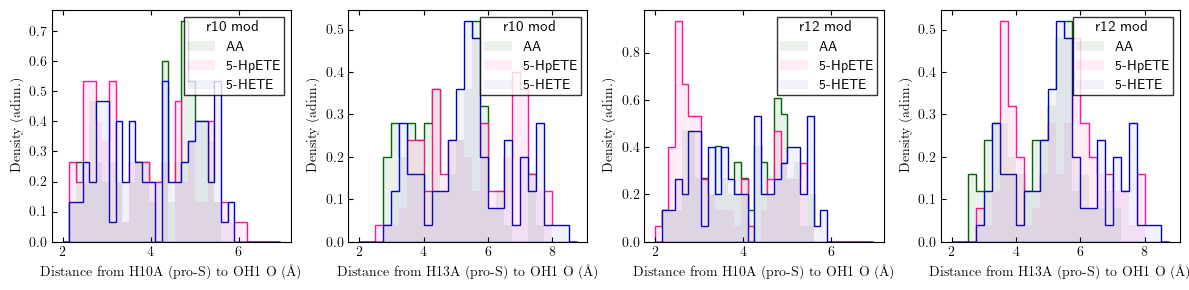

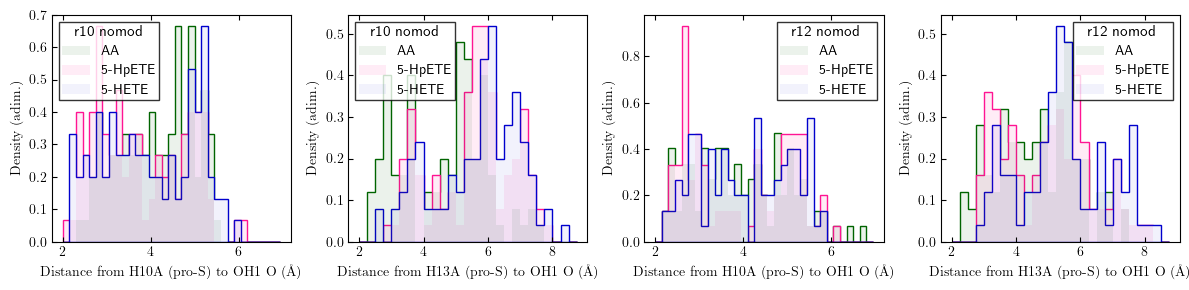

In [9]:
# read chimera distance data

radius_list = [10, 12]

xdata_AA = []
xdata_5HpETE =[]
xdata_5HETE =[]

for radius in radius_list:
    filename_AA = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/AA_h15_clusterized/sols_{radius}/top100/distances_100.txt'
    data_AA = read_data_chimera(filename_AA, HETE=False)
    
    # append el H10 for radius i
    xdata_AA.append(data_AA[:,2])
    # append el H13 for radius i
    xdata_AA.append(data_AA[:,0])


    filename_5HpETE = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HpETE_h15_clusterized/sols_{radius}/top100/distances_100.txt'
    data_5HPETE = read_data_chimera(filename_5HpETE, HETE=True)
    xdata_5HpETE.append(data_5HPETE[:,3])
    xdata_5HpETE.append(data_5HPETE[:,1])

    filename_5HETE = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HETE_h15_clusterized/sols_12_old/top100/distances_100.txt'
    data_5HETE = read_data_chimera(filename_5HETE, HETE=True)
    xdata_5HETE.append(data_5HETE[:,3])
    xdata_5HETE.append(data_5HETE[:,1])


# plot for the set of ligands, all metrics, one radius, 

# figure settings
xlabels = ['H10A (pro-S)', 'H13A (pro-S)', 'H10A (pro-S)', 'H13A (pro-S)']
xtargets = ['OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'OH1 O']
extra = 'mod'
xradii = [f'r10 {extra}', f'r10 {extra}', f'r12 {extra}', f'r12 {extra}']

bins = np.arange(2, 9, 0.25)
bins_H10 = np.arange(2, 7, 0.15)
bins_ARG = np.arange(1.8, 7, 0.15)
bins_ILE = np.arange(1, 11, 0.3)
bin_list = [bins_H10, bins, bins_H10, bins]


# generate the figure
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12, 3))
_axes = axes[0], axes[1], axes[2], axes[3]


for i in range(len(_axes)):
    
    _axes[i].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
    _axes[i].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")

    #ax1.axvline(x=thereshold_line, color='black', alpha=0.8, ls='dotted', label='thereshold')    
    if i==7:
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=0.05)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.05)   

    else:
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, edgecolor='darkgreen', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, color='darkgreen', label='AA', alpha=.08)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.08)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=.05)    

            
    _axes[i].set(xlabel=r'$\textnormal{Distance from '+f'{xlabels[i]}'+r' to '+f'{xtargets[i]}'+' (Å)}$', ylabel=r'$\textnormal{Density (adim.)}$')
    _axes[i].legend(loc='best', prop={'size': 10}, title=r'$\textsf{'+f'{xradii[i]}'+r'}$', title_fontsize=11)

plt.tight_layout()
plt.savefig('docking_analysis_Arg402_mod.png', dpi=400)
plt.show()















# read chimera distance data

radius_list = [10, 12]

xdata_AA = []
xdata_5HpETE =[]
xdata_5HETE =[]

for radius in radius_list:
    filename_AA = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/AA_h15_clusterized/sols_{radius}_old/top100/distances_100.txt'
    data_AA = read_data_chimera(filename_AA, HETE=False)
    
    # append el H10 for radius i
    xdata_AA.append(data_AA[:,2])
    # append el H13 for radius i
    xdata_AA.append(data_AA[:,0])


    filename_5HpETE = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HpETE_h15_clusterized/sols_{radius}_old/top100/distances_100.txt'
    data_5HPETE = read_data_chimera(filename_5HpETE, HETE=True)
    xdata_5HpETE.append(data_5HPETE[:,3])
    xdata_5HpETE.append(data_5HPETE[:,1])

    filename_5HETE = f'/Users/sergiortizropero/TFG_chem/1_dockings/sirius/dockings_notrelaxed/5-HETE_h15_clusterized/sols_{radius}_old/top100/distances_100.txt'
    data_5HETE = read_data_chimera(filename_5HETE, HETE=True)
    xdata_5HETE.append(data_5HETE[:,3])
    xdata_5HETE.append(data_5HETE[:,1])


# plot for the set of ligands, all metrics, one radius, 

# figure settings
xlabels = ['H10A (pro-S)', 'H13A (pro-S)', 'H10A (pro-S)', 'H13A (pro-S)']
xtargets = ['OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'OH1 O', 'OH1 O']
extra = 'nomod'
xradii = [f'r10 {extra}', f'r10 {extra}', f'r12 {extra}', f'r12 {extra}']

bins = np.arange(2, 9, 0.25)
bins_H10 = np.arange(2, 7, 0.15)
bins_ARG = np.arange(1.8, 7, 0.15)
bins_ILE = np.arange(1, 11, 0.3)
bin_list = [bins_H10, bins, bins_H10, bins]


# generate the figure
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12, 3))
_axes = axes[0], axes[1], axes[2], axes[3]


for i in range(len(_axes)):
    
    _axes[i].tick_params(bottom=True, top=True, left=True, right=False,direction="in")
    _axes[i].tick_params(labelbottom=True, labeltop=False, labelleft=True,labelright=False, direction="in")

    #ax1.axvline(x=thereshold_line, color='black', alpha=0.8, ls='dotted', label='thereshold')    
    if i==7:
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=0.05)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.05)   

    else:
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, edgecolor='darkgreen', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True, edgecolor='deeppink', color='w', histtype='stepfilled',)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, edgecolor='mediumblue', color='w', histtype='stepfilled')
        _axes[i].hist(xdata_AA[i], bins=bin_list[i], density=True, color='darkgreen', label='AA', alpha=.08)    
        _axes[i].hist(xdata_5HpETE[i], bins=bin_list[i], density=True,  color='deeppink', label='5-HpETE', alpha=.08)
        _axes[i].hist(xdata_5HETE[i], bins=bin_list[i], density=True, color='mediumblue', label='5-HETE', alpha=.05)    

            
    _axes[i].set(xlabel=r'$\textnormal{Distance from '+f'{xlabels[i]}'+r' to '+f'{xtargets[i]}'+' (Å)}$', ylabel=r'$\textnormal{Density (adim.)}$')
    _axes[i].legend(loc='best', prop={'size': 10}, title=r'$\textsf{'+f'{xradii[i]}'+r'}$', title_fontsize=11)

plt.tight_layout()
plt.savefig('docking_analysis_Arg402_nomod.png', dpi=400)
plt.show()

# i com es pot comprovar, no hi ha diferències significatives